In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)

In [2]:
#generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers+2, X_inliers-2]

#generate outliers 
X_outliers = np.random.uniform(low = -4, high = 4, size = (20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype = int)

ground_truth[-n_outliers:] = -1

In [3]:
#fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

y_pred = clf.fit_predict(X)
n_errors = (y_pred!=ground_truth).sum()

X_scores = clf.negative_outlier_factor_

C:\Users\Pramath Haritz\AppData\Local\Temp\ipykernel_3012\2944746687.py:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
C:\Users\Pramath Haritz\AppData\Local\Temp\ipykernel_3012\2944746687.py:24: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


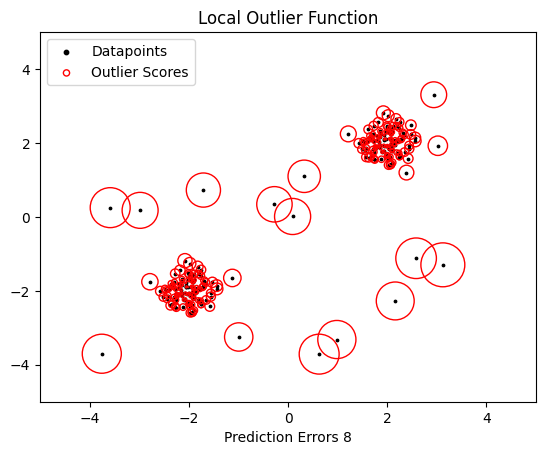

In [4]:
plt.title("LocalOutlierFactor(LOF)")
plt.scatter(
    X[:,0], 
    X[:,1], 
    color = 'k', 
    s= 3.0, 
    label = "Datapoints"
)
radius = (X_scores.max() - X_scores)/(X_scores.max() - X_scores.min())
plt.scatter(
    X[:,0],
    X[:,1],
    s = 1000 * radius,
    edgecolors = "r",
    facecolors = "none",
    label = "Outlier Scores"
)
plt.axis("Tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel(f"Prediction Errors {n_errors}")
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.title("Local Outlier Function")
plt.show()